In [34]:
# 오류메시지 무시
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import platform
warnings.filterwarnings('ignore')

In [35]:
# 한글 찍기
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family = 'Malgun Gothic')   # 또는 '맑은 고딕'
else:
    print('Unknown system... sorry~~~~')

import warnings
warnings.filterwarnings('ignore')

In [36]:
# 0. 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------
# 1) CSV 불러오기
# --------------------------------
df_age = pd.read_csv("./202412_202412_연령별인구현황_연간.csv", encoding='cp949')

# --------------------------------
# 2) 첫 번째 행을 컬럼명으로 사용
# --------------------------------
df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)

# --------------------------------
# 3) NaN 컬럼 제거
# --------------------------------
df_age = df_age.loc[:, df_age.columns.notna()]

# --------------------------------
# 4) 숫자 데이터를 쉼표 제거 후 숫자로 변환
# --------------------------------
for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# --------------------------------
# 5) 행정동만 필터링
# --------------------------------
age_dong = df_age[df_age["행정구역"].str.contains("동대문구") &
                  df_age["행정구역"].str.contains("동")].reset_index(drop=True)


In [37]:
age_dong.head(3)

,행정구역,2024년_계_총인구수,2024년_계_연령구간인구수,2024년_계_0~9세,2024년_계_10~19세,2024년_계_20~29세,2024년_계_30~39세,2024년_계_40~49세,2024년_계_50~59세,2024년_계_60~69세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
0,서울특별시 동대문구 (1123000000),338735,338735,17174,22270,55543,50145,47253,51914,48622,...,10957,29461,24480,22967,25732,24864,16088,8725,1336,38
1,서울특별시 동대문구 용신동(1123053600),38619,38619,1834,1879,6905,7202,5441,5723,5110,...,908,3799,3615,2589,2743,2445,1546,885,123,3
2,서울특별시 동대문구 제기동(1123054500),22895,22895,712,1146,4350,3079,2496,3425,3710,...,541,2084,1333,1117,1613,1866,1346,778,120,4


In [38]:
age_dong = age_dong.drop(0)

In [39]:
# 1. 연령대 그룹별 인구 코드

# 연령대별 컬럼 자동 구분
child_cols = [c for c in df_age.columns if ("0~9" in c) or ("10~19" in c)]
youth_cols = [c for c in df_age.columns if ("20~29" in c) or ("30~39" in c)]
mid_cols   = [c for c in df_age.columns if ("40~49" in c) or ("50~59" in c)]
elder_cols = [c for c in df_age.columns if ("60~69" in c) or ("70" in c) or ("80" in c) or ("90" in c)]

# 연령대별 합계
age_dong["아동"] = age_dong[child_cols].sum(axis=1)
age_dong["청년"] = age_dong[youth_cols].sum(axis=1)
age_dong["중년"] = age_dong[mid_cols].sum(axis=1)
age_dong["고령층"] = age_dong[elder_cols].sum(axis=1)

# 전체 인구
age_dong["총인구"] = age_dong["2024년_계_총인구수"]


In [40]:
# 2. 데이터 분석 결과 인사이트 자동 요약

print("🔍 동대문구 연령대별 인구 분석 결과")
print()

print("➡ 청년층(20~39세)이 가장 많은 동:")
print(age_dong.sort_values("청년", ascending=False)[["행정구역", "청년"]].head(), "\n")

print("➡ 아동(0~19세)이 가장 많은 동:")
print(age_dong.sort_values("아동", ascending=False)[["행정구역", "아동"]].head(), "\n")

print("➡ 고령층(65세 이상)이 가장 많은 동:")
print(age_dong.sort_values("고령층", ascending=False)[["행정구역", "고령층"]].head(), "\n")

print("➡ 전체 인구가 가장 많은 동:")
print(age_dong.sort_values("총인구", ascending=False)[["행정구역", "총인구"]].head(), "\n")


🔍 동대문구 연령대별 인구 분석 결과

➡ 청년층(20~39세)이 가장 많은 동:
0                            행정구역     청년
1      서울특별시 동대문구 용신동(1123053600)  28214
7    서울특별시 동대문구 장안제1동(1123065000)  21206
3    서울특별시 동대문구 전농제1동(1123056000)  19412
12   서울특별시 동대문구 휘경제2동(1123073000)  17728
5   서울특별시 동대문구 답십리제1동(1123060000)  17356 

➡ 아동(0~19세)이 가장 많은 동:
0                           행정구역     아동
8   서울특별시 동대문구 장안제2동(1123066000)  10846
7   서울특별시 동대문구 장안제1동(1123065000)   9128
3   서울특별시 동대문구 전농제1동(1123056000)   8426
5  서울특별시 동대문구 답십리제1동(1123060000)   8390
1     서울특별시 동대문구 용신동(1123053600)   7798 

➡ 고령층(65세 이상)이 가장 많은 동:
0                           행정구역    고령층
7   서울특별시 동대문구 장안제1동(1123065000)  20874
1     서울특별시 동대문구 용신동(1123053600)  19262
3   서울특별시 동대문구 전농제1동(1123056000)  17922
6  서울특별시 동대문구 답십리제2동(1123061000)  17136
8   서울특별시 동대문구 장안제2동(1123066000)  16716 

➡ 전체 인구가 가장 많은 동:
0                           행정구역    총인구
1     서울특별시 동대문구 용신동(1123053600)  38619
7   서울특별시 동대문구 장안제1동(1123065000)  37110
8   서울특별시 동대문구 장안제2동(1123066000)  3291

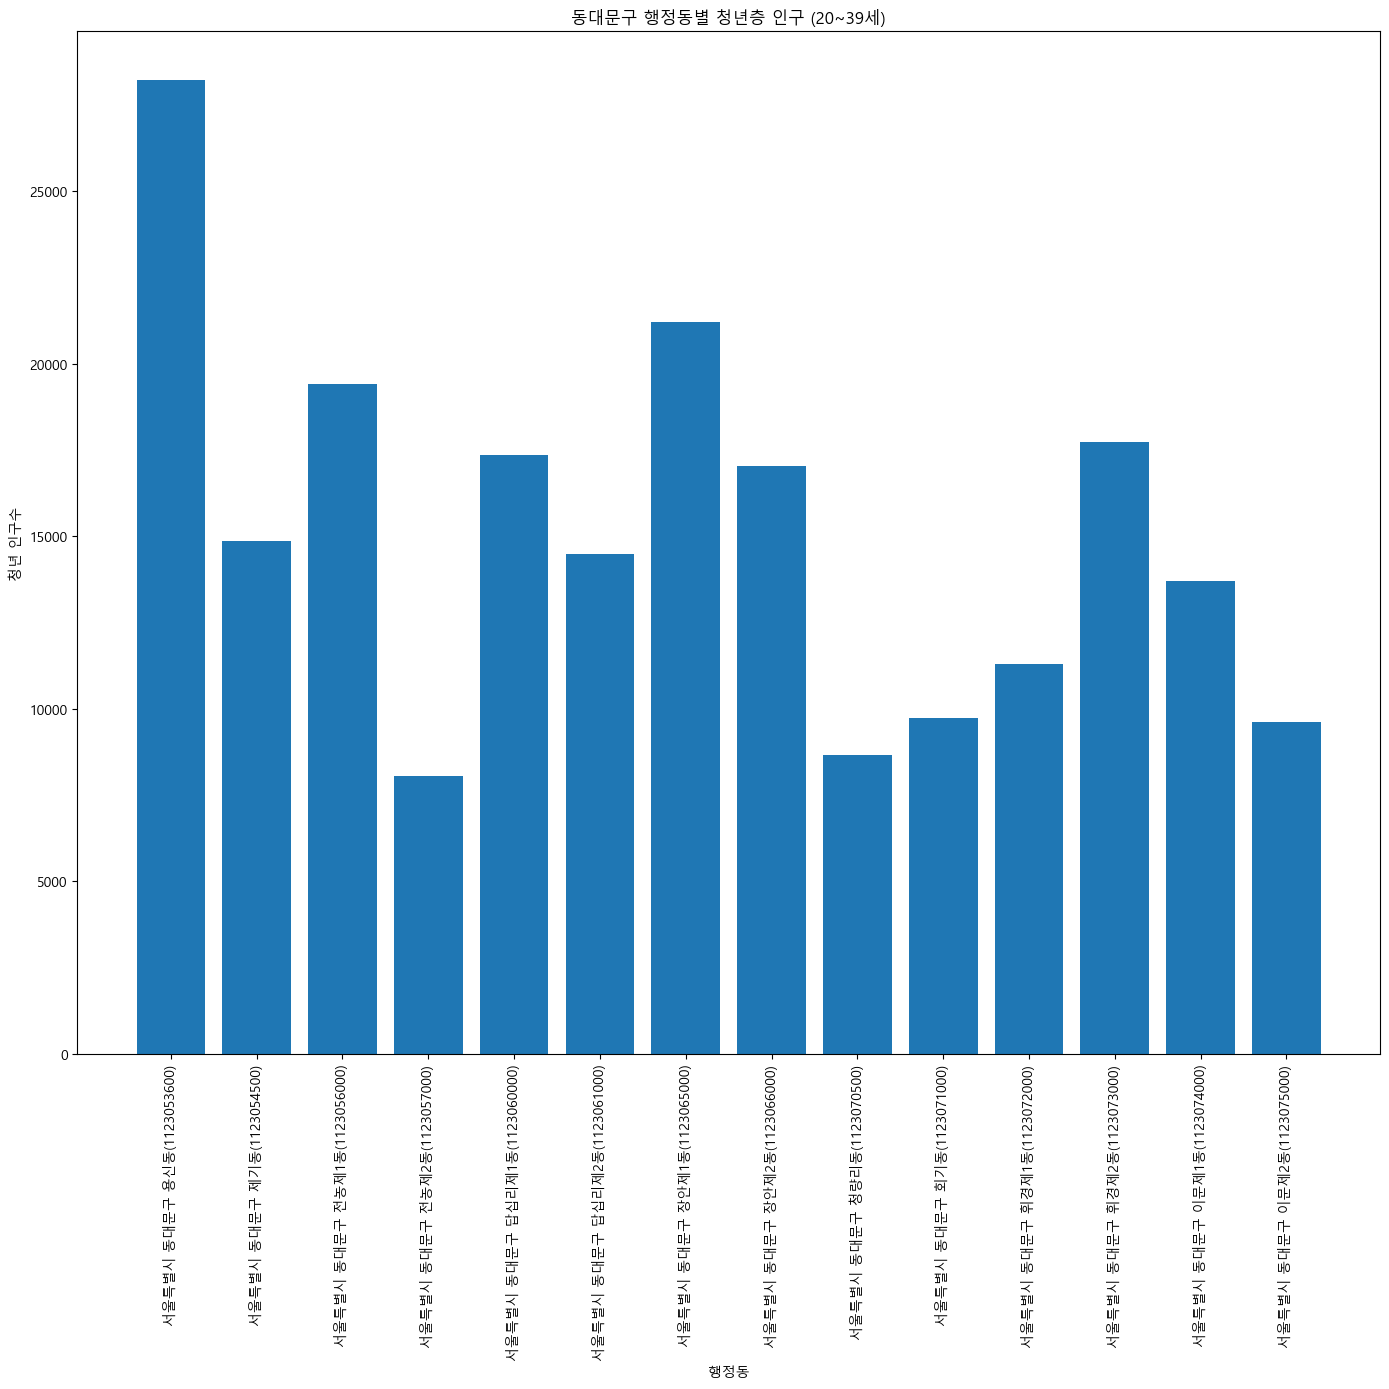

In [41]:
# 3. 막대그래프(동별 청년층 인구)
plt.figure(figsize=(14,14))
plt.bar(age_dong["행정구역"], age_dong["청년"])
plt.xticks(rotation=90)
plt.title("동대문구 행정동별 청년층 인구 (20~39세)")
plt.xlabel("행정동")
plt.ylabel("청년 인구수")
plt.tight_layout()
plt.show()


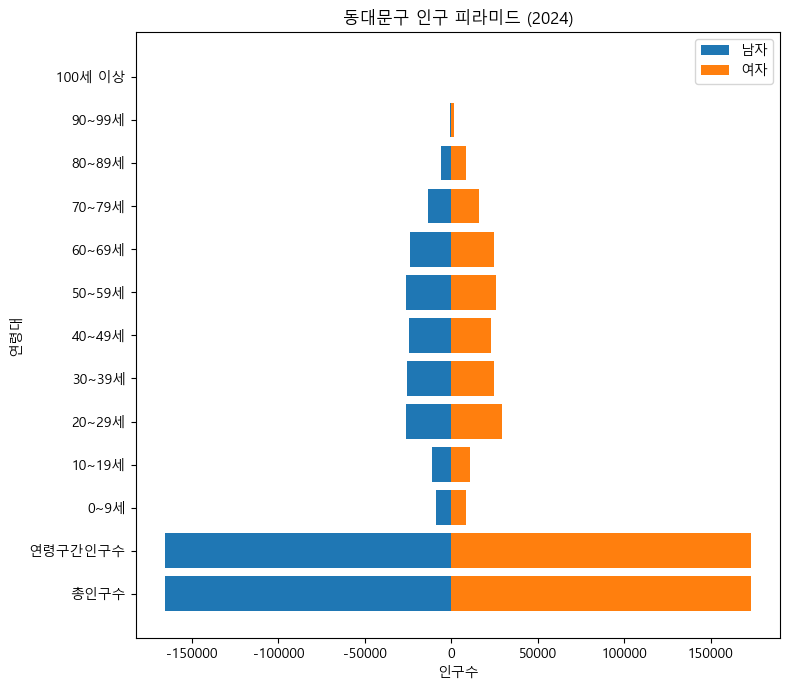

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------
# 1) 연령별 인구 CSV 불러오기
# ------------------------------------
df_age = pd.read_csv("202412_202412_연령별인구현황_연간.csv", encoding='cp949')

# ------------------------------------
# 2) 첫 번째 행(컬럼명 포함된 행)을 헤더로 설정
# ------------------------------------
df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)

# NaN 컬럼 제거
df_age = df_age.loc[:, df_age.columns.notna()]

# 숫자형 변환
for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# ------------------------------------
# 3) 동대문구 전체 데이터만 선택
# ------------------------------------
df_total = df_age[df_age["행정구역"] == "서울특별시 동대문구 (1123000000)"].iloc[0]

# ------------------------------------
# 4) 남·녀 연령대 컬럼 자동 분리
# ------------------------------------
male_cols = [c for c in df_total.index if "남" in c]
female_cols = [c for c in df_total.index if "여" in c]

male = df_total[male_cols].astype(int).tolist()
female = df_total[female_cols].astype(int).tolist()

# 연령대 라벨(남자 컬럼에서 '2024년_남_' 부분 제거)
labels = [c.replace("2024년_남_", "") for c in male_cols]

# ------------------------------------
# 5) 인구 피라미드 그래프 그리기
# ------------------------------------
plt.figure(figsize=(8,7))

# 남자 인구는 왼쪽으로 보이도록 음수(-) 처리
plt.barh(labels, [-m for m in male], label="남자")

# 여자 인구는 오른쪽(양수)
plt.barh(labels, female, label="여자")

plt.title("동대문구 인구 피라미드 (2024)")
plt.xlabel("인구수")
plt.ylabel("연령대")
plt.legend()
plt.tight_layout()
plt.show()


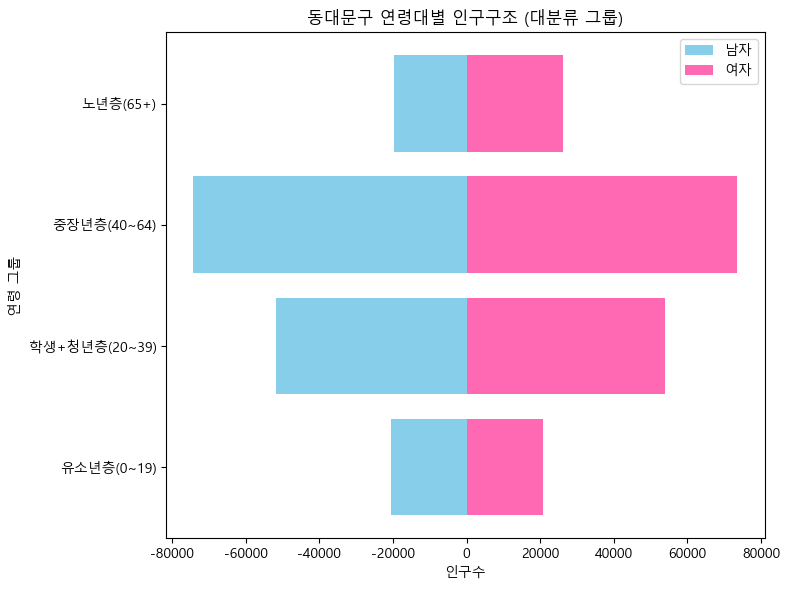

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) CSV 불러오기
# ----------------------------------------
df_age = pd.read_csv("202412_202412_연령별인구현황_연간.csv", encoding='cp949')

# 첫 행을 컬럼명으로 설정
df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)

# NaN 컬럼 제거
df_age = df_age.loc[:, df_age.columns.notna()]

# 숫자형 변환
for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# ----------------------------------------
# 2) 동대문구 전체 데이터 선택
# ----------------------------------------
total = df_age[df_age["행정구역"] == "서울특별시 동대문구 (1123000000)"].iloc[0]

# ----------------------------------------
# 3) 연령대 그룹별 컬럼 자동 분류
# ----------------------------------------

# 유소년층 (0~19세)
youth_child_cols = [c for c in total.index if ("남" in c or "여" in c) and ("0~9" in c or "10~19" in c)]

# 학생 + 청년층 (20~39세)
student_young_cols = [c for c in total.index if ("남" in c or "여" in c) and ("20~29" in c or "30~39" in c)]

# 중장년층 (40~64세 → 40~49 + 50~59 + 남여_60~69)
middle_cols = [c for c in total.index if ("남" in c or "여" in c) and 
               ("40~49" in c or "50~59" in c or "60~69" in c)]

# 노년층 (65세 이상 → 70~79 + 80~89 + 90 이상)
elder_cols = [c for c in total.index if ("남" in c or "여" in c) and 
              ("70" in c or "80" in c or "90" in c or "100" in c)]

# ----------------------------------------
# 4) 남/녀 각각 그룹별 합계 계산
# ----------------------------------------

def sum_gender(cols, gender):
    return sum(total[c] for c in cols if gender in c)

labels = ["유소년층(0~19)", "학생+청년층(20~39)", "중장년층(40~64)", "노년층(65+)"]

male = [
    sum_gender(youth_child_cols, "남"),
    sum_gender(student_young_cols, "남"),
    sum_gender(middle_cols, "남"),
    sum_gender(elder_cols, "남")
]

female = [
    sum_gender(youth_child_cols, "여"),
    sum_gender(student_young_cols, "여"),
    sum_gender(middle_cols, "여"),
    sum_gender(elder_cols, "여")
]

# ----------------------------------------
# 5) 인구 피라미드 시각화
# ----------------------------------------
plt.figure(figsize=(8,6))

           # 오른쪽(양수)
# 남자: 파란색 (왼쪽)
plt.barh(labels, [-m for m in male], color="skyblue", label="남자")

# 여자: 핑크색 (오른쪽)
plt.barh(labels, female, color="#FF69B4", label="여자")


plt.title("동대문구 연령대별 인구구조 (대분류 그룹)")
plt.xlabel("인구수")
plt.ylabel("연령 그룹")
plt.legend()

plt.tight_layout()
plt.show()


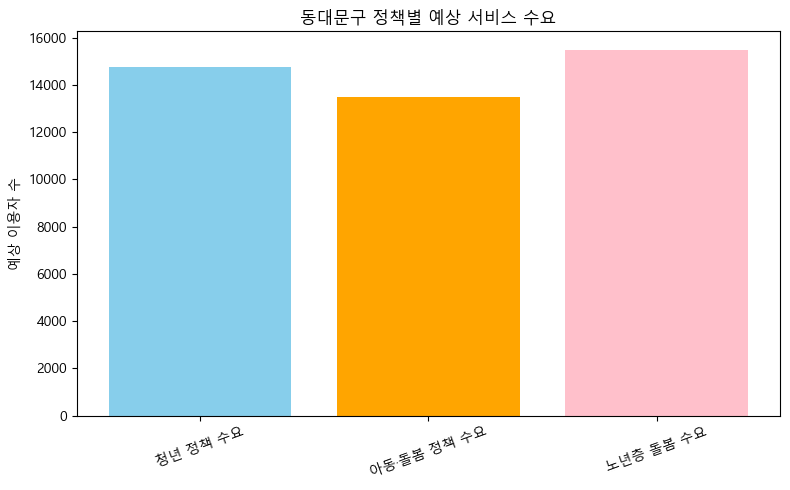

In [44]:
# 정책 수요 예측 코드
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1) 정책별 인구 기반 수요 산출 함수
# ------------------------------

def estimate_demand(pop, factor):
    """
    pop: 인구수
    factor: 정책 이용률(예: 0.15 → 15% 이용 예상)
    """
    return pop * factor

# ------------------------------
# 2) 연령층별 인구 입력
# (너의 데이터로 계산한 값 넣으면 돼)
# ------------------------------

youth = 82000     # 청년층(20~39세)
children = 45000  # 유소년(0~19세)
elder = 62000     # 노년층(65+)

# ------------------------------
# 3) 정책별 이용률 가정(예시)
# ------------------------------

youth_factor = 0.18      # 청년 서비스 이용률 약 18%
children_factor = 0.30   # 유소년 돌봄/교육 서비스 이용률 30%
elder_factor = 0.25      # 노년층 복지/의료 서비스 이용률 25%

# ------------------------------
# 4) 수요 예측
# ------------------------------

demand = {
    "청년 정책 수요": estimate_demand(youth, youth_factor),
    "아동·돌봄 정책 수요": estimate_demand(children, children_factor),
    "노년층 돌봄 수요": estimate_demand(elder, elder_factor)
}

# ------------------------------
# 5) 그래프 시각화
# ------------------------------

plt.figure(figsize=(8,5))
plt.bar(demand.keys(), demand.values(), color=["skyblue", "orange", "pink"])
plt.title("동대문구 정책별 예상 서비스 수요")
plt.ylabel("예상 이용자 수")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) 엑셀 파일 불러오기
# -----------------------------
file_path = "./202510_202510_주민등록인구기타현황(출생등록)_월간.xlsx"
df = pd.read_excel(file_path)

# -----------------------------
# 2) '출생' 또는 '출생등록'이 포함된 컬럼 자동 찾기
# -----------------------------
birth_cols = [col for col in df.columns if "출생" in str(col) or "출생등록" in str(col)]

if len(birth_cols) == 0:
    raise ValueError("❌ '출생' 관련 컬럼을 찾을 수 없습니다. 엑셀 파일 구조를 확인해주세요.")

birth_col = birth_cols[0]   # 첫 번째 출생 관련 컬럼 사용

# -----------------------------
# 3) 월 또는 연도 컬럼 자동 감지
# -----------------------------
date_cols = [col for col in df.columns if "월" in str(col) or "일자" in str(col) or "년" in str(col)]

if len(date_cols) == 0:
    # 인덱스를 x축에 사용
    df["구분"] = df.index
    x_col = "구분"
else:
    x_col = date_cols[0]

# -----------------------------
# 4) 숫자형 변환 (필수)
# -----------------------------
df[birth_col] = pd.to_numeric(df[birth_col], errors="coerce")

# -----------------------------
# 5) 출생아 수 막대그래프
# -----------------------------
plt.figure(figsize=(10,5))
plt.bar(df[x_col], df[birth_col], color="skyblue")

plt.title("출생아 수 막대그래프")
plt.xlabel(x_col)
plt.ylabel("출생아 수")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


ValueError: ❌ '출생' 관련 컬럼을 찾을 수 없습니다. 엑셀 파일 구조를 확인해주세요.

In [51]:
import pandas as pd

file_path = "./202510_202510_주민등록인구기타현황(출생등록)_월간.xlsx"
df = pd.read_excel(file_path)

df.columns


Index(['※ 매월 말일자 통계 현황', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4'],
      dtype='object')

In [53]:
import pandas as pd

file_path = "./202510_202510_주민등록인구기타현황(출생등록)_월간.xlsx"

xls = pd.ExcelFile(file_path)
xls.sheet_names


['주민등록인구기타현황(출생등록)']

In [55]:
import pandas as pd

file_path = "./202510_202510_주민등록인구기타현황(출생등록)_월간.xlsx"

df = pd.read_excel(file_path, sheet_name="주민등록인구기타현황(출생등록)")
df.columns


Index(['※ 매월 말일자 통계 현황', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4'],
      dtype='object')

In [64]:
import pandas as pd

file_path = "./202510_202510_주민등록인구기타현황(출생등록)_월간.xlsx"

df_raw = pd.read_excel(file_path, sheet_name="주민등록인구기타현황(출생등록)", header=None)
df_raw.head(20)



,0,1,2,3,4
0,※ 매월 말일자 통계 현황,NaN,NaN,NaN,NaN
1,NaN,NaN,2025년10월,NaN,NaN
2,행정기관코드,행정기관,남자인구수,여자인구수,계
3,1123000000,서울특별시 서울특별시 동대문구,83,79,162
4,1123051500,서울특별시 동대문구 신설동,7,4,11
5,1123053300,서울특별시 동대문구 용두동,4,12,16
6,1123054500,서울특별시 동대문구 제기동,5,2,7
7,1123056000,서울특별시 동대문구 전농제1동,6,5,11
8,1123057000,서울특별시 동대문구 전농제2동,8,4,12
9,1123060000,서울특별시 동대문구 답십리제1동,6,6,12


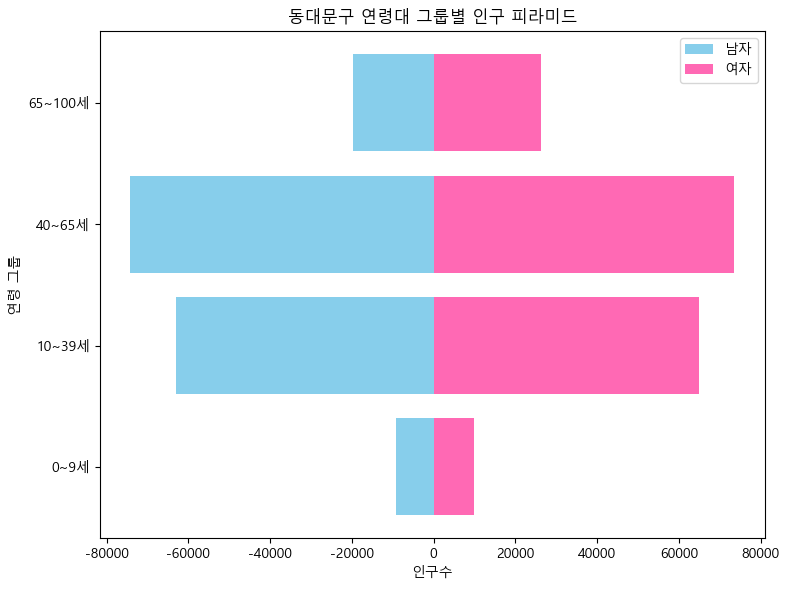

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) 연령별 인구 CSV 불러오기
# ----------------------------------------
df_age = pd.read_csv("202412_202412_연령별인구현황_연간.csv", encoding='cp949')

# 첫 행을 컬럼명으로 설정
df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)

# NaN 컬럼 제거
df_age = df_age.loc[:, df_age.columns.notna()]

# 숫자형 변환
for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# ----------------------------------------
# 2) 동대문구 전체 데이터 선택
# ----------------------------------------
total = df_age[df_age["행정구역"] == "서울특별시 동대문구 (1123000000)"].iloc[0]

# ----------------------------------------
# 3) 연령대별 컬럼 분류
# ----------------------------------------

# 0~9세
group1_cols = [c for c in total.index if "0~9" in c]

# 10~39세 (10~19, 20~29, 30~39)
group2_cols = [c for c in total.index if 
               ("10~19" in c) or ("20~29" in c) or ("30~39" in c)]

# 40~65세 (40~49, 50~59, 60~69 중 65세까지 포함)
# 60~69는 전체 포함하지만, 실제 65세 초과분까지 들어가므로 근사값으로 전체 묶음
group3_cols = [c for c in total.index if 
               ("40~49" in c) or ("50~59" in c) or ("60~69" in c)]

# 65~100세 (70세 이상 전체)
group4_cols = [c for c in total.index if 
               ("70" in c) or ("80" in c) or ("90" in c) or ("100" in c)]

# ----------------------------------------
# 4) 남·여 인구 합계 계산
# ----------------------------------------
def sum_gender(cols, gender):
    return sum(total[c] for c in cols if gender in c)

labels = ["0~9세", "10~39세", "40~65세", "65~100세"]

male = [
    sum_gender(group1_cols, "남"),
    sum_gender(group2_cols, "남"),
    sum_gender(group3_cols, "남"),
    sum_gender(group4_cols, "남"),
]

female = [
    sum_gender(group1_cols, "여"),
    sum_gender(group2_cols, "여"),
    sum_gender(group3_cols, "여"),
    sum_gender(group4_cols, "여"),
]

# ----------------------------------------
# 5) 인구 피라미드 시각화
# ----------------------------------------
plt.figure(figsize=(8,6))

plt.barh(labels, [-m for m in male], color="skyblue", label="남자")  # 왼쪽
plt.barh(labels, female, color="#FF69B4", label="여자")              # 오른쪽

plt.title("동대문구 연령대 그룹별 인구 피라미드")
plt.xlabel("인구수")
plt.ylabel("연령 그룹")
plt.legend()
plt.tight_layout()
plt.show()


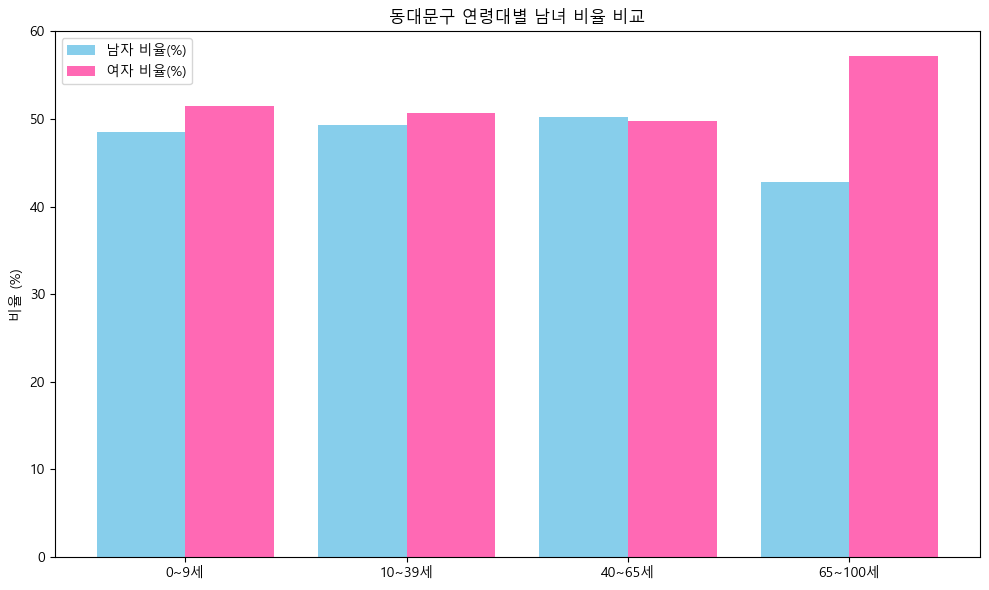

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) CSV 불러오기
# ----------------------------------------
df_age = pd.read_csv("202412_202412_연령별인구현황_연간.csv", encoding='cp949')

df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)
df_age = df_age.loc[:, df_age.columns.notna()]

for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# ----------------------------------------
# 2) 동대문구 전체 데이터
# ----------------------------------------
total = df_age[df_age["행정구역"] == "서울특별시 동대문구 (1123000000)"].iloc[0]

# ----------------------------------------
# 3) 연령대 그룹 분류
# ----------------------------------------
group1_cols = [c for c in total.index if "0~9" in c]
group2_cols = [c for c in total.index if ("10~19" in c or "20~29" in c or "30~39" in c)]
group3_cols = [c for c in total.index if ("40~49" in c or "50~59" in c or "60~69" in c)]
group4_cols = [c for c in total.index if ("70" in c or "80" in c or "90" in c or "100" in c)]

# ----------------------------------------
# 4) 인구 합계 계산
# ----------------------------------------
def sum_gender(cols, gender):
    return sum(total[c] for c in cols if gender in c)

labels = ["0~9세", "10~39세", "40~65세", "65~100세"]

male = [
    sum_gender(group1_cols, "남"),
    sum_gender(group2_cols, "남"),
    sum_gender(group3_cols, "남"),
    sum_gender(group4_cols, "남"),
]

female = [
    sum_gender(group1_cols, "여"),
    sum_gender(group2_cols, "여"),
    sum_gender(group3_cols, "여"),
    sum_gender(group4_cols, "여"),
]

# ----------------------------------------
# 5) 비율(%) 계산
# ----------------------------------------
total_pop = [m + f for m, f in zip(male, female)]

male_ratio = [(m / t) * 100 for m, t in zip(male, total_pop)]
female_ratio = [(f / t) * 100 for f, t in zip(female, total_pop)]

# ----------------------------------------
# 6) 막대그래프 시각화
# ----------------------------------------
x = range(len(labels))

plt.figure(figsize=(10,6))

plt.bar(x, male_ratio, width=0.4, label="남자 비율(%)", color="skyblue")
plt.bar([i + 0.4 for i in x], female_ratio, width=0.4, label="여자 비율(%)", color="#FF69B4")

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("비율 (%)")
plt.title("동대문구 연령대별 남녀 비율 비교")
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------
# 1) 엑셀 불러오기
# ------------------------------------
file_path = "./2024_2024_주민등록 인구 기타현황(아동청소년청년 인구현황)_연간.xlsx"

df = pd.read_excel(file_path)

# ------------------------------------
# 2) 컬럼 전처리
#    (Unnamed 제거, 컬럼명 정비)
# ------------------------------------
df = df.loc[:, df.columns.notna()]
df.columns = df.columns.astype(str)

# ------------------------------------
# 3) 동 목록 확인
# ------------------------------------
dong_col = [c for c in df.columns if "동" in c or "행정구역" in c][0]

# ------------------------------------
# 4) 연령대 컬럼 자동 감지 (남/여)
# ------------------------------------
male_cols = [c for c in df.columns if "남" in c]
female_cols = [c for c in df.columns if "여" in c]

# 연령대 라벨 통일
age_labels = [c.replace("남_", "").replace("여_", "").replace("2024년_", "") for c in male_cols]

# 숫자형 변환
for col in male_cols + female_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ------------------------------------
# 5) 동별 인구 피라미드 함수
# ------------------------------------
def plot_population_pyramid(dong_name):
    # 해당 동 데이터 선택
    row = df[df[dong_col].astype(str).str.contains(dong_name)].iloc[0]

    male = row[male_cols].values
    female = row[female_cols].values

    # 남자는 음수로 표시 (왼쪽)
    male_neg = -male

    plt.figure(figsize=(8, 7))
    plt.barh(age_labels, male_neg, color="skyblue", label="남자")
    plt.barh(age_labels, female, color="#FF69B4", label="여자")

    plt.title(f"{dong_name} 인구 피라미드 (2024년)")
    plt.xlabel("인구수")
    plt.ylabel("연령대")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ------------------------------------
# 6) 사용 예시
# ------------------------------------
# plot_population_pyramid("전농1동")
plot_population_pyramid("제기동")
# plot_population_pyramid("이문1동")
# plot_population_pyramid("회기동")


IndexError: list index out of range

In [62]:
import pandas as pd

# ----------------------------------------
# 1) CSV 불러오기
# ----------------------------------------
df_age = pd.read_csv("202412_202412_연령별인구현황_연간.csv", encoding='cp949')

# 첫 행을 컬럼명으로 설정
df_age.columns = df_age.iloc[0]
df_age = df_age.drop(0).reset_index(drop=True)

# NaN 컬럼 제거
df_age = df_age.loc[:, df_age.columns.notna()]

# 숫자형 변환
for col in df_age.columns[1:]:
    df_age[col] = df_age[col].astype(str).str.replace(",", "")
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

# ----------------------------------------
# 2) 동대문구 전체 행 추출
# ----------------------------------------
total = df_age[df_age["행정구역"] == "서울특별시 동대문구 (1123000000)"].iloc[0]

# ----------------------------------------
# 3) 전체 남/여 인구 합산
# ----------------------------------------
male_cols = [c for c in total.index if "남" in c]
female_cols = [c for c in total.index if "여" in c]

total_male = total[male_cols].sum()
total_female = total[female_cols].sum()

# ----------------------------------------
# 4) 성비 계산
# ----------------------------------------
sex_ratio = (total_male / total_female) * 100   # 여자 100명당 남자 수

print("동대문구 전체 남자 인구:", total_male)
print("동대문구 전체 여자 인구:", total_female)
print(f"동대문구 성비(여자 100명당 남자): {sex_ratio:.2f}")


동대문구 전체 남자 인구: 496860
동대문구 전체 여자 인구: 519345
동대문구 성비(여자 100명당 남자): 95.67
